Notebook

# Climate Displacement

Disaster Types
- Year
- State
- Households Inflow (Number of Returns) (NOR(I))
- Households Outflow (Number of Returns) (NOR(O))
- Individuals Inflow (Number of Exemptions) (NOE(I))
- Individuals Outflow (Number of Exemptions) (NOE(O))
- Chemical
- Dam/Levee Break
- Drought
- Earthquake
- Fire
- Flood
- Human Cause
- Hurricane
- Ice
- Mud/Landslide
- Other
- Snow
- Storm
- Terrorism
- Tornado
- Tsunami
- Typhoon
- Volcano
- Water
- Winter

In [313]:
"""
Folders Setup

code 
    notebook.ipynb
    data
        Disasters
            FEMA_dataset.csv
        StateMigration
            1990to1991StateMigration
                 1990to1991StateMigrationInflow
                     Alabama91in.xls
                     Alaska91in.xls
                     .
                     .
                     .
                     Wisconsin91in.xls
                     Wyoming91in.xls 
                 1990to1991StateMigrationOutflow
                     Alabama91Out.xls
                     Alaska91Out.xls 
                     .
                     .
                     .
                     Wisconsin91Out.xls
                     Wyoming91Out.xls 
            .
            .
            .
            2008to2009StateMigration
            2009to2010StateMigration
            2010to2011StateMigration 
"""

'\nFolders Setup\n\ncode \n    notebook.ipynb\n    data\n        Disasters\n            FEMA_dataset.csv\n        StateMigration\n            1990to1991StateMigration\n                 1990to1991StateMigrationInflow\n                     Alabama91in.xls\n                     Alaska91in.xls\n                     .\n                     .\n                     .\n                     Wisconsin91in.xls\n                     Wyoming91in.xls \n                 1990to1991StateMigrationOutflow\n                     Alabama91Out.xls\n                     Alaska91Out.xls \n                     .\n                     .\n                     .\n                     Wisconsin91Out.xls\n                     Wyoming91Out.xls \n            .\n            .\n            .\n            2008to2009StateMigration\n            2009to2010StateMigration\n            2010to2011StateMigration \n'

## Pseudocode:

### FEMA Dataset Pre-processing (Neely)
1. Create new FEMA_dataset with columns 
    - contains Year, State, Disaster Type
2. Name file "State_Disasters_by_Year"

### StateMigration Data Pre-Processing (Ben)
1. Convert all datasets in StateMigration from .xls into .csv files
2. Extract "Total Flow" row with "Number of Returns" and "Number of Exemptions" - assign I if from inflow and O if from outflow - from every state file.
3. Extract "State" and "Year" from every file
4. Create file with "State" (from file name), "Year" (from file name), "Number_of_Returns_I", "Number_of_Exemptions_I", "Number_of_Returns_I" and "Number_of_Exemptions_O"
5. Name file "State Migration by Year"

### Merge Datasets (Both)
1. Merge datasets on common attributes "Year" and "State"
2. Name dataset "State_Migration_and_Disasters_by_Year"

#### Train and Testing
1. Create training and testing datasets
    Questions: How should we split training and testing data?
2. Create Neural Network models
    Input: Year, State, Disaster Type
    Output: Migration Inflow (Household/Individual), Migration Outflow (Household/Individual)
3. Put training and testing through the Neural Network models.
4. Evaluate which models are the most effective.

In [49]:
# adding imports
import shutil
import pandas as pd
import os
import glob
#import xlrd
import csv
import numpy as np
#from fastai import *

### FEMA Dataset Pre-processing

Creates State_Disasters_by_Year.csv with:
- State
- Disaster Type
- Start Year
- End Year

In [315]:
# FEMA Dataset Preprocessing

# copy original FEMA dataset to new file
original = r'../code/data/Disasters/FEMA_dataset.csv'
new = r'../code/data/Disasters/State_Disasters_by_Year.csv'
shutil.copyfile(original, new)

# read csv file
data = pd.read_csv('../code/data/Disasters/State_Disasters_by_Year.csv')

# delete irrelevant rows
data.pop('Declaration Number')
data.pop('Declaration Type')
data.pop('Declaration Date')
data.pop('County')
data.pop('Disaster Title')
data.pop('Close Date')
data.pop('Individual Assistance Program')
data.pop('Public Assistance Program')
data.pop('Hazard Mitigation Program')
data.pop('Individuals & Households Program')

# extract years
data['Start Year'] = pd.DatetimeIndex(data['Start Date']).year
data['End Year'] = pd.DatetimeIndex(data['End Date']).year

# delete start and end dates
data.pop('Start Date')
data.pop('End Date')

print(data)

# save changes csv
data.to_csv('../code/data/Disasters/State_Disasters_by_Year.csv')


      State Disaster Type  Start Year  End Year
0        TX        Winter        1989    1989.0
1        TX        Winter        1989    1989.0
2        TX        Winter        1989    1989.0
3        TX        Winter        1989    1989.0
4        TX        Winter        1989    1989.0
...     ...           ...         ...       ...
36785    CA         Storm        2017    2017.0
36786    CA         Storm        2017    2017.0
36787    CA         Storm        2017    2017.0
36788    CA         Storm        2017    2017.0
36789    CA         Storm        2017    2017.0

[36790 rows x 4 columns]


### Converting State Migration data from .xls to .csv

Converting all datasets in StateMigration from .xls to .csv

In [316]:
# Convert all files in StateMigration folder from .xls to .csv

# create list of xls files
xls_list = glob.glob("/Users/ben/Desktop/climate-displacement/code/data/StateMigration/*/*/*.xls")

# replace xls 
for xls_file in xls_list:
    
    wb = xlrd.open_workbook(xls_file)
    sh = wb.sheet_by_index(0)
    csv_file = open(xls_file[0:-3]+'csv', "w")
    wr = csv.writer(csv_file, quoting=csv.QUOTE_ALL)
    
    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))
        
    csv_file.close()
    
    # remove .xls files
    os.remove(xls_file)


### More data wrangling - StateMigration dataset
- Extract "Total Flow" row with "Number of Returns" and "Number of Exemptions"
- Assign "I" if from inflow and "O" if from outflow - for every state file
- Extract "State" and "Year" from every file
- Create file with "State" (from file name), "Year" (from file name), "Number of Returns_I", "Number of Exemptions I", "Number of Returns O" and "Number of Exemptions O"

### Pseudocode

1. create output path in repository for the merged StateMigration dataset

2. read each csv file in the StateMigration folder, and for each file:

    a. check the csv files to make sure they are the intended data
    
    b. remove the original csv files

In [317]:
# set new file location for merged StateMigration dataset
output_path = r'../code/data/StateMigration/State_Migrations_by_Year.csv'

In [318]:
# create the output file at output_path
output = open(output_path, "w")
output.close()

In [319]:
# create empty DataFrame object
df = pd.DataFrame()
df.insert(0,'State', '')
df.insert(1,'Year', '')
df.insert(2,'NOR(I)', '')
df.insert(3,'NOE(I)', '')
df.insert(4,'NOR(O)', '')
df.insert(5,'NOE(O)', '')

In [320]:
# create dictionary of "state initial keys" with multiple "values"
# run each segment through dictionary, and convert into state initial
stateDict = {
    "AL":['Alabama', 'al', 'AL', 'alab', 'Alab'],
    "AK":['Alaska', 'ak', 'AK', 'alas', 'Alas'],
    "AZ":['Arizona', 'az', 'AZ', 'ariz', 'Ariz'],
    "AR":['Arkansas', 'ar', 'AR', 'arka', 'Arka', 'aka'],
    "CA":['California', 'ca', 'CA', 'cali', 'Cali'],
    "CO":['Colorado', 'co', 'CO', 'colo', 'Colo'],
    "CT":['Connecticut', 'ct', 'CT', 'conn', 'Conn'],
    "DE":['Delaware', 'de', 'DE', 'dela', 'Dela'],
    "DC":['DistrictofColumbia', 'Districtofcolumbia', 'District of Columbia', 'dc', 'DC', 'dist', 'Dist', 'DiCo', 'dico'],
    "FL":['Florida', 'fl', 'FL', 'flor', 'Flor'],
    "GA":['Georgia', 'ga', 'GA', 'geor', 'Geor'],
    "HI":['Hawaii', 'hi', 'HI', 'hawa', 'Hawa'],
    "ID":['Idaho', 'id', 'ID', 'idah', 'Idah'],
    "IL":['Illinois', 'il', 'IL', 'illi', 'Illi'],
    "IN":['Indiana', 'in', 'IN', 'indi', 'Indi'],
    "IA":['Iowa', 'ia', 'IA', 'iowa'],
    "KS":['Kansas', 'ks', 'KS', 'kans', 'Kans'],
    "KY":['Kentucky', 'ky', 'KY', 'kent', 'Kent'],
    "LA":['Louisiana', 'la', 'LA', 'loui', 'Loui'],
    "MA":['Massachusetts', 'ma', 'MA', 'mass', 'Mass'],
    "MD":['Maryland', 'md', 'MD', 'mary', 'Mary'],
    "ME":['Maine', 'me', 'ME', 'main', 'Main'],
    "MI":['Michigan', 'mi', 'MI', 'mich', 'Mich'],
    "MN":['Minnesota', 'mn', 'MN', 'minn', 'Minn'],
    "MO":['Missouri', 'mo', 'MO', 'Miso', 'miso'],
    "MS":['Mississippi', 'ms', 'MS', 'Misi', 'misi', 'miss', 'Miss'],
    "MT":['Montana', 'mt', 'MT', 'mont', 'Mont'],
    "NC":['North Carolina', 'NorthCarolina', 'nc', 'NC', 'NoCa', 'noca', 'ncar', 'Northcarolina'],
    "ND":['North Dakota', 'NorthDakota', 'nd', 'ND', 'NoDa', 'noda', 'ndak', 'Northdakota'],
    "NE":['Nebraska', 'ne', 'NE', 'Nebr', 'nrbt', 'nebr'],
    "NH":['New Hampshire', 'NewHampshire', 'nh', 'NH', 'NeHa', 'neha', 'newh'],
    "NJ":['New Jersey', 'NewJersey', 'nj', 'NJ', 'NeJe', 'neje', 'newj', 'Newjersey'],
    "NM":['New Mexico', 'NewMexico', 'nm', 'NM', 'NeMe', 'neme', 'newm', 'Newmexico'],
    "NV":['Nevada', 'nv', 'NV', 'Neva', 'neva'],
    "NY":['New York', 'NewYork', 'ny', 'NY', 'newy', 'NeYo', 'neyo', 'newY','Newyork'],
    "OH":['Ohio', 'oh', 'OH', 'ohio', 'nhio'],
    "OK":['Oklahoma', 'ok', 'OK', 'okla', 'Okla'],
    "OR":['Oregon', 'or', 'OR', 'oreg', 'Oreg', 'oeg'],
    "PA":['Pennsylvania', 'pa', 'PA', 'penn', 'Penn'],
    "RI":['Rhode Island', 'RhodeIsland', 'ri', 'RI', 'Rhls', 'rhod', 'Rhod', 'RhIs'],
    "SC":['South Carolina', 'SouthCarolina', 'sc', 'SC', 'SoCa', 'soca', 'scar', 'Southcarolina'],
    "SD":['South Dakota', 'SouthDakota', 'sd', 'SD', 'SoDa', 'soda', 'sdak', 'Southdakota'],
    "TN":['Tennessee', 'tn', 'TN', 'Tenn', 'tenn'],
    "TX":['Texas', 'tx', 'TX', 'texa', 'Texa'],
    "UT":['Utah', 'ut', 'UT', 'utah'],
    "VA":['Virginia', 'va', 'VA', 'virg', 'Virg', 'vrg'],
    "VT":['Vermont', 'vt', 'VT', 'verm', 'Verm'],
    "WA":['Washington', 'wa', 'WA', 'wash', 'Wash'],
    "WI":['Wisconsin', 'wi', 'WI', 'wisc', 'Wisc', 'wiso', 'wsc'],
    "WV":['West Virginia', 'WestVirginia', 'wv', 'WV', 'west', 'wevi', 'wvir', 'Westvirginia'],
    "WY":['Wyoming', 'wy', 'WY', 'wyom', 'Wyom']    
}

def getKey(val):
    for key, valueList in stateDict.items():
         for value in valueList:
            if val == value:
                 return key
    
    return False

print(getKey('Wisconsin'))

WI


In [321]:
# read csv file
# csv_list = glob.glob("/Users/ben/Desktop/climate-displacement/code/data/StateMigration/*/*/*.csv")
csv_list = glob.glob("../code/data/StateMigration/*/*/*.csv")

# create list of row_params
list_param = []

for csv_file in csv_list:
    # os.path.split returns a list of (head, tail) where head is the parent directories 
    # and tail is the filename and extension
    temp = os.path.split(csv_file)
    temp2 = os.path.split(temp[0])
    
    # get file name and parent folder from temp, temp2 respectively
    filename = temp[1]
    parentfile = temp2[1]
    
    # print (filename, parentfile)
    # print (type(filename))
    
    # extract state, year, and inflow/outflow
    # three different naming conventions in the StateMigration dataset
    # 1) [State][Year1Year2 e.g. (0708)][in/out]
    # 2) [State][Year2 e.g. 91][In/Out]
    # 3) [Year1Year2 like 1)]inmig[in/out][state INITIAL e.g. AL]
    # 4) [first 4 letters of State][Year2][in/ot]
    # 5) s9[last digits of Year1, Year2 e.g. 56][state INITIAL][ir/or]
    # 6) same as 4) but with extra "r" at the end
    
    # naming convention 1: used for years 2004-2009
    name1 = [2004,2005,2006,2007,2008]
    # naming convention 2: used for years 1990-1993
    name2 = [1990,1991,1992]
    # naming convention 3: used for years 2009-2011
    name3 = [2009,2010]
    # naming convention 4: used for years 1993-1995, 1996-2000, 2001-2004
    name4 = [1993,1994,1996,1997, 1998, 1999, 2001,2002,2003]
    # naming convention 5: used for years 1995-1996
    name5 = 1995
    # naming convention 6: used for years 2000-2001
    name6 = 2000
    
    # extract inflow/outflow, year using parentfile, and state using filename
    if parentfile[-6] == 'u':
        io = parentfile[-7:]
    elif parentfile[-5] == 'n':
        io = parentfile[-6:]
    year = int(parentfile[0:4])
    
    #2009to2010StateMigrationInflow
    # print(io, year)
    
    if year in name1:
        if io == 'Inflow':
            state = filename[:-10]
        elif io == 'Outflow':
            state = filename[:-11]
    elif year in name2:
        if io == 'Inflow':
            state = filename[:-8]
        elif io == 'Outflow':
            state = filename[:-9]
    elif year in name3:
        state = filename[-6:-4]
    elif year in name4:
        state = filename[:4]
        if state == 'vrg9':
            state = 'vrg'
        elif state == 'vrg0':
            state = 'vrg'
        elif state == 'az94':
            state = 'az'
        elif state == 'aka9':
            state = 'aka'
        elif state == 'wsc9':
            state = 'wsc'
    elif year == name5:
        state = filename[-8:-6]
    elif year == name6:
        state = filename[:4]
        if state == 'vrg0':
            state = 'vrg'
        elif state == 'oeg0':
            state = 'oeg'

    si = getKey(state)
    if si != False:
        row_param = [si, year, io]
    
    # the total flow data in each years are located in different rows and columns.
    # type1 - 1990, 1991: located in row 9, columns D and F
    type1 = [1990, 1991]
    # type2 - 1992-1994, 2004-2006: located in row 9, columns D and E
    type2 = [1992,1993,1994,2004,2005,2006]
    # type3 - 1995-2003, 2007-2008: located in row 10, columns D and E
    type3 = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2007,2008]
    # type4 - 2009-2010: located in row 8, columns E and F
    type4 = [2009,2010]
    
    data = pd.read_csv(csv_file)
    if si != False:
        if year in type1:
            # total = data.iloc[7] #7, np.r_[3,5]
            totaltemp = data.iat[7,0]
            list = totaltemp.split(",")
            if ((si == "AL") and (io == "Outflow")):
                nor = list[4]
                noe = list[6]
            else:
                nor = list[3]
                noe = list[5]
        elif year in type2:
            # total = data.iloc[7] #7
            totaltemp = data.iat[7,0]
            list = totaltemp.split(",")
            nor = list[3]
            noe = list[4]
        elif year in type3:
            if year == 2003:
                nor = data.iat[8,4]
                noe = data.iat[8,5]
            elif year == 1997:
                nor = data.iat[8,4]
                noe = data.iat[8,5]
            elif year == 2002:
                totaltemp = data.iat[8,0]
                list = totaltemp.split(",")
                nor = list[3]
                noe = list[4]
            else:
                totaltemp = data.iat[7,0]
                list = totaltemp.split(",")
                nor = list[3]
                noe = list[4]
        elif year in type4:
            total = data.iloc[6]
            nor = data.iat[6,4]
            noe = data.iat[6,5]
        
        row_param.append(nor)
        row_param.append(noe)
        
        list_param.append(row_param)

In [322]:
current = []

for row in list_param:
    isIOMatch = False

    for row2 in current:
        if ((row[0] == row2[0]) and (row[1] == row2[1])):
            
            if row[2] == "Inflow": # you have inflow data to add, outflow already exists
                row2.insert(3, row[3]) #0-si, 1-year, 2-io, 3-nor, 4-noe
                row2.insert(4, row[4])
                row2.pop(2)
                isIOMatch = True
            elif row[2] == "Outflow": # you have outflow data to add, inflow already exists
                row2.append(row[3])
                row2.append(row[4])
                row2.pop(2)
                isIOMatch = True
    if isIOMatch == False:
        if row[2] == "Inflow": # adding inflow data
            newrow = [row[0],row[1],"Inflow",row[3],row[4]]
        elif (row[2] == "Outflow"): # adding outflow data
            newrow = [row[0],row[1],"Outflow",row[3],row[4]]
        current.append(newrow)   

In [323]:
data = pd.DataFrame(current, columns=['State', 'Year', 'NOR(I)', 'NOE(I)', 'NOR(O)', 'NOE(O)'])
data

     State  Year    NOR(I)    NOE(I)    NOR(O)    NOE(O)
0       MN  2010   41038.0   73463.0   45173.0   77893.0
1       AZ  2010   83528.0  158038.0   80278.0  162164.0
2       AL  2010   42880.0   89794.0   43563.0   88001.0
3       MO  2010   55637.0  106395.0   60740.0  115708.0
4       NC  2010  114845.0  226709.0  101963.0  201396.0
...    ...   ...       ...       ...       ...       ...
1066    WA  2009   77278.0  147288.0   72538.0  136914.0
1067    TX  2009  204851.0  421684.0  163893.0  328137.0
1068    OR  2009   44892.0   78364.0   41180.0   74673.0
1069    NV  2009   44554.0   82221.0   47379.0   91828.0
1070    TN  2009   70156.0  139051.0   64116.0  127939.0

[1071 rows x 6 columns]


In [326]:
"""
# Create final dataset

1. Copy State_Disaster_by_Year
2. Add column for each natural disaster
3. Join over common year and state matches
4. Increase number of natural disasters if natural disaster of same type already exists in a year
"""

# FEMA Dataset Preprocessing

# copy data from State_Migration_by_Year.csv
original = r'../code/data/StateMigration/State_Migrations_by_Year.csv'
new = r'../code/data/Total/Neural_Network_Input.csv'
shutil.copyfile(original, new)

# read csv file
data = pd.read_csv(new)

# delete irrelevant rows
data.pop('Unnamed: 0')

# create climate disaster columns
data["Drought"] = 0
data["Earthquake"] = 0
data["Fire"] = 0
data["Flood"] = 0
data["Human Cause"] = 0
data["Hurricane"] = 0
data["Ice"] = 0
data["Mud/Landslide"] = 0
data["Other"] = 0
data["Snow"] = 0
data["Storm"] = 0
data["Terrorism"] = 0
data["Tornado"] = 0
data["Tsunami"] = 0
data["Typhoon"] = 0
data["Volcano"] = 0
data["Water"] = 0
data ["Winter"] = 0
data["Total disasters"] = 0

data.to_csv('../code/data/Total/Neural_Network_Input.csv')



     State  Year    NOR(I)    NOE(I)    NOR(O)    NOE(O)  Drought  Earthquake  \
0       MN  2010   41038.0   73463.0   45173.0   77893.0        0           0   
1       AZ  2010   83528.0  158038.0   80278.0  162164.0        0           0   
2       AL  2010   42880.0   89794.0   43563.0   88001.0        0           0   
3       MO  2010   55637.0  106395.0   60740.0  115708.0        0           0   
4       NC  2010  114845.0  226709.0  101963.0  201396.0        0           0   
...    ...   ...       ...       ...       ...       ...      ...         ...   
1066    WA  2009   77278.0  147288.0   72538.0  136914.0        0           0   
1067    TX  2009  204851.0  421684.0  163893.0  328137.0        0           0   
1068    OR  2009   44892.0   78364.0   41180.0   74673.0        0           0   
1069    NV  2009   44554.0   82221.0   47379.0   91828.0        0           0   
1070    TN  2009   70156.0  139051.0   64116.0  127939.0        0           0   

      Fire  Flood  ...  Sno

In [340]:
joinpath = r'../code/data/Disasters/State_Disasters_by_Year.csv'
datajoin = pd.read_csv(joinpath)

# join data with datajoin to create final dataset
for rowjoin in datajoin.iterrows():
    # loop over every row in datajoin
    join_state = rowjoin[1][1]
    join_start_year = rowjoin[1][3]
    join_disaster = rowjoin[1][2]

    # loop over every row in data to check for match
    for rowdata in data.iterrows():
        state = rowdata[1][0]
        year = rowdata[1][1]

        assert(len(rowdata[1]) == 25)

        drought = int(rowdata[1][7])
        earthquake = int(rowdata[1][8])
        fire = int(rowdata[1][9])
        flood = int(rowdata[1][10])
        human_cause = int(rowdata[1][11])
        hurricane = int(rowdata[1][12])
        ice = int(rowdata[1][13])
        mud_landslide = int(rowdata[1][14])
        other = int(rowdata[1][15])
        snow = int(rowdata[1][16])
        storm = int(rowdata[1][17])
        terrorism = int(rowdata[1][18])
        tornado = int(rowdata[1][19])
        tsunami = int(rowdata[1][20])
        typhoon = int(rowdata[1][21])
        volcano = int(rowdata[1][22])
        water = int(rowdata[1][23])
        winter = int(rowdata[1][24])


        if (state == join_state) and (year == join_start_year):
            if join_disaster == "Drought":
                drought += 1
                data.loc[rowdata[0]:rowdata[0],"Drought"] = drought
            elif join_disaster == "Earthquake":
                earthquake += 1
                data.loc[rowdata[0]:rowdata[0],"Earthquake"] = earthquake
          
            elif join_disaster == "Fire":
                fire += 1
                data.loc[rowdata[0]:rowdata[0],"Fire"] = fire
              
            elif join_disaster == "Flood":
                flood += 1
                data.loc[rowdata[0]:rowdata[0],"Flood"] = flood
             
            elif join_disaster == "Human Cause":
                human_cause += 1
                data.loc[rowdata[0]:rowdata[0],"Human Cause"] = human_cause
               
            elif join_disaster == "Hurricane":
                hurricane += 1
                data.loc[rowdata[0]:rowdata[0],"Hurricane"] = hurricane
              
            elif join_disaster == "Ice":
                ice += 1
                data.loc[rowdata[0]:rowdata[0],"Ice"] = ice
              
            elif join_disaster == "Mud/Landslide":
                mud_landslide += 1
                data.loc[rowdata[0]:rowdata[0],"Mud/Landslide"] = mud_landslide
                
            elif join_disaster == "Other":
                other += 1
                data.loc[rowdata[0]:rowdata[0],"Other"] = other
               
            elif join_disaster == "Snow":
                snow += 1
                data.loc[rowdata[0]:rowdata[0],"Snow"] = snow
                
            elif join_disaster == "Storm":
                storm += 1
                data.loc[rowdata[0]:rowdata[0],"Storm"] = storm
               
            elif join_disaster == "Terrorism":
                terrorism += 1
                data.loc[rowdata[0]:rowdata[0],"Terrorism"] = terrorism
            
            elif join_disaster == "Tornado":
                tornado += 1
                data.loc[rowdata[0]:rowdata[0],"Tornado"] = tornado
             
            elif join_disaster == "Tsunami":
                tsunami += 1
                data.loc[rowdata[0]:rowdata[0],"Tsunami"] = tsunami
             
            elif join_disaster == "Typhoon":
                typhoon += 1
                data.loc[rowdata[0]:rowdata[0],"Earthquake"] = earthquake
             
            elif join_disaster == "Volcano":
                volcano += 1
                data.loc[rowdata[0]:rowdata[0],"Volcano"] = volcano
            
            elif join_disaster == "Water":
                water += 1
                data.loc[rowdata[0]:rowdata[0],"Water"] = water
             
            elif join_disaster == "Winter":
                winter += 1
                data.loc[rowdata[0]:rowdata[0],"Winter"] = winter
              
            else:
                print("else")
            

# save changes csv
data.to_csv('./data/Total/Neural_Network_Input.csv')

else
else
else
     State  Year    NOR(I)    NOE(I)    NOR(O)    NOE(O)  Drought  Earthquake  \
0       MN  2010   41038.0   73463.0   45173.0   77893.0        0           0   
1       AZ  2010   83528.0  158038.0   80278.0  162164.0        0           0   
2       AL  2010   42880.0   89794.0   43563.0   88001.0        0           0   
3       MO  2010   55637.0  106395.0   60740.0  115708.0        0           0   
4       NC  2010  114845.0  226709.0  101963.0  201396.0        0           0   
...    ...   ...       ...       ...       ...       ...      ...         ...   
1066    WA  2009   77278.0  147288.0   72538.0  136914.0        0           0   
1067    TX  2009  204851.0  421684.0  163893.0  328137.0        0           0   
1068    OR  2009   44892.0   78364.0   41180.0   74673.0        0           0   
1069    NV  2009   44554.0   82221.0   47379.0   91828.0        0           0   
1070    TN  2009   70156.0  139051.0   64116.0  127939.0        0           0   

      Fire  

### Neural Network

fastai: https://docs.fast.ai/tabular.core.html

Input: 
- Disasters

Output:
- NOR(I): Number of returns (inflow)
- NOE(I): Number of exemptions (outflow)
- NOR(O): Number of returns (inflow)
- NOE(O): Number of exemptions (outflow)

In [217]:
from fastai import *
from fastai.tabular.all import *

# import data
df = pd.read_csv('../code/data/Total/Total_Input_Training.csv')
df.head()

,Unnamed: 0,State,Year,NOR(I),NOE(I),NOR(O),NOE(O),Drought,Earthquake,Fire,...,Snow,Storm,Terrorism,Tornado,Tsunami,Typhoon,Volcano,Water,Winter,Total disasters
0,NaN,All_States,1990,2907749,5847606,2890627,5778931,0,0,1,...,1,10,0,1,0,0,0,0,1,31
1,NaN,All_States,1991,2945112,5865274,2812812,5581421,0,0,2,...,7,7,0,2,0,0,0,0,0,35
2,NaN,All_States,1992,2963061,5941502,2862291,5777889,0,3,2,...,0,10,0,4,0,0,0,0,0,38
3,NaN,All_States,1993,2917053,5828928,2846298,5712493,1,1,2,...,18,8,0,3,0,0,0,0,0,47
4,NaN,All_States,1994,3018906,5942498,2937673,5814595,0,1,0,...,5,17,0,1,0,0,0,3,1,32


In [218]:
# dataset for graph of migrants per year
df_migration_graph = df.copy()

df_migration_graph.pop('Drought')
df_migration_graph.pop('Earthquake')
df_migration_graph.pop('Fire')
df_migration_graph.pop('Flood')
df_migration_graph.pop('Human Cause')
df_migration_graph.pop('Hurricane')
df_migration_graph.pop('Ice')
df_migration_graph.pop('Mud/Landslide')
df_migration_graph.pop('Other')
df_migration_graph.pop('Snow')
df_migration_graph.pop('Storm')
df_migration_graph.pop('Terrorism')
df_migration_graph.pop('Tornado')
df_migration_graph.pop('Tsunami')
df_migration_graph.pop('Typhoon')
df_migration_graph.pop('Volcano')
df_migration_graph.pop('Water')
df_migration_graph.pop('Winter')
df_migration_graph.pop('Total disasters')
df_migration_graph.pop('Unnamed: 0')
df_migration_graph.pop('State')

df_migration_graph.head()
df_migration_graph = df_migration_graph.transpose()
header_row = 0 
df_migration_graph.columns = df_migration_graph.iloc[header_row]
df_migration_graph = df_migration_graph.drop('Year')

df_migration_graph = df_migration_graph.transpose()
df_migration_graph.head()

,NOR(I),NOE(I),NOR(O),NOE(O)
Year,,,,
1990,2907749,5847606,2890627,5778931
1991,2945112,5865274,2812812,5581421
1992,2963061,5941502,2862291,5777889
1993,2917053,5828928,2846298,5712493
1994,3018906,5942498,2937673,5814595


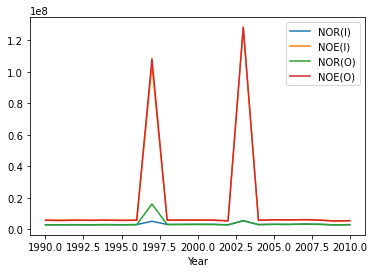

In [219]:
# create graph of number of migrants 

ax = df_migration_graph.plot.line()

In [220]:
# dataset for create graph of natural disasters per year

df_disaster_graph = df.copy()

df_disaster_graph.pop('NOR(I)')
df_disaster_graph.pop('NOE(I)')
df_disaster_graph.pop('NOR(O)')
df_disaster_graph.pop('NOE(O)')
df_disaster_graph.pop('Unnamed: 0')
df_disaster_graph.pop('State')

df_disaster_graph.head()
df_disaster_graph = df_disaster_graph.transpose()
header_row = 0 
df_disaster_graph.columns = df_disaster_graph.iloc[header_row]
df_disaster_graph = df_disaster_graph.drop('Year')

df_disaster_graph = df_disaster_graph.transpose()
df_disaster_graph.head()

,Drought,Earthquake,Fire,Flood,Human Cause,Hurricane,Ice,Mud/Landslide,Other,Snow,Storm,Terrorism,Tornado,Tsunami,Typhoon,Volcano,Water,Winter,Total disasters
Year,,,,,,,,,,,,,,,,,,,
1990,0,0,1,16,0,0,1,0,0,1,10,0,1,0,0,0,0,1,31
1991,0,0,2,8,0,6,3,0,0,7,7,0,2,0,0,0,0,0,35
1992,0,3,2,16,0,3,0,0,0,0,10,0,4,0,0,0,0,0,38
1993,1,1,2,12,1,1,0,0,0,18,8,0,3,0,0,0,0,0,47
1994,0,1,0,4,0,0,0,0,0,5,17,0,1,0,0,0,3,1,32


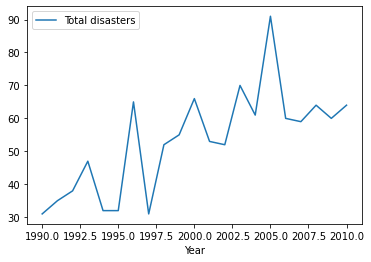

In [221]:
# create graph of total number of disasters 

ax = df_disaster_graph.plot.line(y='Total disasters')

[]

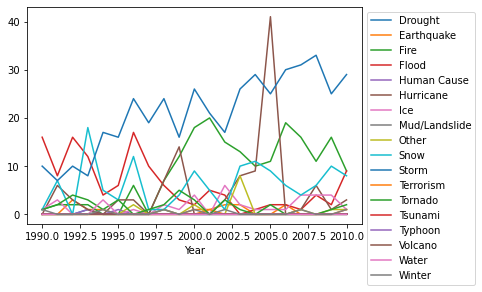

In [222]:
# create graph of disasters 

ax = df_disaster_graph.plot.line(y=['Drought','Earthquake','Fire','Flood','Human Cause','Hurricane','Ice','Mud/Landslide','Other','Snow','Storm','Terrorism','Tornado','Tsunami','Typhoon','Volcano','Water','Winter'])
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [223]:
# normalize data
normalized_df = (df-df.mean())/df.std()
normalized_df = normalized_df.fillna(0)
normalized_df.head()

,Drought,Earthquake,Fire,Flood,Human Cause,Hurricane,Ice,Mud/Landslide,NOE(I),NOE(O),...,Terrorism,Tornado,Total disasters,Tsunami,Typhoon,Unnamed: 0,Volcano,Water,Winter,Year
0,-0.218218,-0.730297,-1.175773,1.858414,-0.316624,-0.575789,-0.404755,-0.218218,-0.314334,-0.314584,...,-0.218218,-0.422421,-1.417013,0.0,0.0,0.0,0.0,-0.218218,1.380131,-1.611646
1,-0.218218,-0.730297,-1.029671,0.342814,-0.316624,0.089802,0.728560,-0.218218,-0.313805,-0.320389,...,-0.218218,0.259951,-1.162133,0.0,0.0,0.0,0.0,-0.218218,-0.690066,-1.450481
2,-0.218218,2.556039,-1.029671,1.858414,-0.316624,-0.242994,-0.971413,-0.218218,-0.311526,-0.314614,...,-0.218218,1.624696,-0.970972,0.0,0.0,0.0,0.0,-0.218218,-0.690066,-1.289317
3,4.364358,0.365148,-1.029671,1.100614,3.007926,-0.464858,-0.971413,-0.218218,-0.314892,-0.316536,...,-0.218218,0.942324,-0.397492,0.0,0.0,0.0,0.0,-0.218218,-0.690066,-1.128152
4,-0.218218,0.365148,-1.321875,-0.414986,-0.316624,-0.575789,-0.971413,-0.218218,-0.311496,-0.313535,...,-0.218218,-0.422421,-1.353293,0.0,0.0,0.0,0.0,4.364358,1.380131,-0.966988


In [224]:
# split data
splits = RandomSplitter(valid_pct=0.2)(range_of(normalized_df))

In [225]:
# create neural network data loader
dls = TabularPandas(normalized_df, procs=[FillMissing],
                                cont_names = ['Drought','Earthquake','Fire','Flood','Human Cause','Hurricane','Ice','Mud/Landslide','Other','Snow','Storm','Terrorism','Tornado','Tsunami','Typhoon','Volcano','Water','Winter','Total disasters'],
                                y_names=['NOR(I)','NOE(I)','NOR(O)','NOE(O)'],
                                splits = splits)

print(dls.xs.iloc[:5])

     Drought  Earthquake      Fire     Flood  Human Cause  Hurricane  \
11 -0.218218    0.365148  1.600165 -0.225536    -0.316624  -0.575789   
10 -0.218218    0.365148  1.307961 -0.793886    -0.316624  -0.575789   
14 -0.218218   -0.730297  0.139145 -0.983336    -0.316624   0.422598   
0  -0.218218   -0.730297 -1.175774  1.858414    -0.316624  -0.575789   
15 -0.218218   -0.730297  0.285247 -0.793886    -0.316624   3.972419   

         Ice  Mud/Landslide     Other      Snow     Storm  Terrorism  \
11 -0.971413      -0.218218 -0.426553 -0.272188 -0.012067   4.364358   
10  1.295218      -0.218218  0.693148  0.607188  0.621451  -0.218218   
14 -0.404755      -0.218218 -0.426553  1.046877  1.001562  -0.218218   
0  -0.404755      -0.218218 -0.426553 -1.151564 -1.405807  -0.218218   
15 -0.404755      -0.218218 -0.426553  0.607188  0.494748  -0.218218   

     Tornado  Tsunami  Typhoon  Volcano     Water    Winter  Total disasters  
11 -1.104793      0.0      0.0      0.0 -0.218218 -0.69

In [226]:
# create batch
dls = dls.dataloaders(bs=2)
dls.show_batch()

,Drought,Earthquake,Fire,Flood,Human Cause,Hurricane,Ice,Mud/Landslide,Other,Snow,Storm,Terrorism,Tornado,Tsunami,Typhoon,Volcano,Water,Winter,Total disasters,NOR(I),NOE(I),NOR(O),NOE(O)
0,-0.218218,-0.730297,0.431349,-0.604436,-0.316624,0.977257,-0.404755,-0.218218,-0.426553,-0.492032,-0.645585,-0.218218,2.307068,0.0,0.0,0.0,-0.218218,-0.690066,0.112269,-0.141894,-0.31122,-0.230616,-0.312914
1,-0.218218,-0.730297,0.285247,-0.793886,-0.316624,3.972419,-0.404755,-0.218218,-0.426553,0.607188,0.494748,-0.218218,0.259951,0.0,0.0,0.0,-0.218218,-0.690066,2.406191,-0.118172,-0.30656,-0.190926,-0.304924


epoch,train_loss,valid_loss,mse,mae,time
0,1.531987,0.122762,0.122762,0.315224,00:00
1,1.468884,0.128481,0.128481,0.309931,00:00
2,1.557220,0.151115,0.151115,0.329770,00:00
3,1.314257,0.235405,0.235405,0.412176,00:00
4,1.158534,0.236242,0.236242,0.406774,00:00
5,1.178518,0.260045,0.260045,0.426505,00:00
6,1.231191,0.278626,0.278626,0.396250,00:00
7,1.205756,0.320385,0.320385,0.463194,00:00
8,1.196320,0.279435,0.279435,0.425461,00:00
9,1.201032,0.245805,0.245805,0.400419,00:00


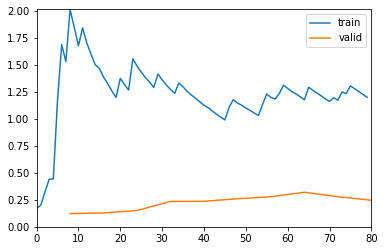

In [235]:
# make neural network model
learn = tabular_learner(dls, metrics=[mse,mae])
learn.fit_one_cycle(10, cbs=ShowGraphCallback())

In [236]:
# plot mse and mae


In [193]:
# clean data for heatmap

normalized_df = (df-df.mean())/df.std()
normalized_df = normalized_df.fillna(0)
normalized_df.pop('State')
normalized_df.pop('Unnamed: 0')
normalized_df.pop('Year')

normalized_df.head()

,Drought,Earthquake,Fire,Flood,Human Cause,Hurricane,Ice,Mud/Landslide,NOE(I),NOE(O),...,Snow,Storm,Terrorism,Tornado,Total disasters,Tsunami,Typhoon,Volcano,Water,Winter
0,-0.218218,-0.730297,-1.175773,1.858414,-0.316624,-0.575789,-0.404755,-0.218218,-0.314334,-0.314584,...,-1.151564,-1.405807,-0.218218,-0.422421,-1.417013,0.0,0.0,0.0,-0.218218,1.380131
1,-0.218218,-0.730297,-1.029671,0.342814,-0.316624,0.089802,0.728560,-0.218218,-0.313805,-0.320389,...,0.167500,-1.785918,-0.218218,0.259951,-1.162133,0.0,0.0,0.0,-0.218218,-0.690066
2,-0.218218,2.556039,-1.029671,1.858414,-0.316624,-0.242994,-0.971413,-0.218218,-0.311526,-0.314614,...,-1.371408,-1.405807,-0.218218,1.624696,-0.970972,0.0,0.0,0.0,-0.218218,-0.690066
3,4.364358,0.365148,-1.029671,1.100614,3.007926,-0.464858,-0.971413,-0.218218,-0.314892,-0.316536,...,2.585785,-1.659215,-0.218218,0.942324,-0.397492,0.0,0.0,0.0,-0.218218,-0.690066
4,-0.218218,-0.730297,-1.321875,-0.036086,3.007926,-0.242994,-0.971413,-0.218218,-0.316481,-0.318252,...,-0.711876,-0.645585,-0.218218,0.942324,-1.353293,0.0,0.0,0.0,-0.218218,-0.690066


In [194]:
# create correlations

focus_cols = ['NOE(I)', 'NOE(O)', 'NOR(I)', 'NOR(O)']
heatmapdata = normalized_df.corr().filter(focus_cols).drop(focus_cols)
heatmapdata = heatmapdata.transpose()
heatmapdata.head()

,Drought,Earthquake,Fire,Flood,Human Cause,Hurricane,Ice,Mud/Landslide,Other,Snow,Storm,Terrorism,Tornado,Total disasters,Tsunami,Typhoon,Volcano,Water,Winter
NOE(I),-0.072151,0.159315,-0.089038,-0.108916,-0.104952,-0.025844,-0.114846,-0.071588,0.679317,-0.018656,0.075169,-0.071651,-0.140033,-0.012323,NaN,NaN,NaN,-0.071373,-0.228009
NOE(O),-0.072528,0.152598,-0.094668,-0.103306,-0.105519,-0.028608,-0.118923,-0.071958,0.665549,-0.025129,0.073466,-0.071925,-0.140937,-0.019771,NaN,NaN,NaN,-0.071840,-0.228465
NOR(I),-0.115969,0.106602,-0.003733,-0.184767,-0.161162,0.017704,-0.090504,-0.051294,0.660974,-0.044284,0.183758,-0.030478,-0.184907,0.064332,NaN,NaN,NaN,-0.082270,-0.206598
NOR(O),-0.070674,-0.109409,-0.248716,0.090214,-0.101446,-0.102668,-0.208084,-0.056630,0.080290,-0.227573,-0.001670,-0.051449,-0.129102,-0.249263,NaN,NaN,NaN,-0.063425,-0.182021


In [195]:
# get highest correlations in predicting each migration movement
heatmapdata = heatmapdata.transpose()
heatmapdata.abs().idxmin()


NOE(I)    Total disasters
NOE(O)    Total disasters
NOR(I)               Fire
NOR(O)              Storm
dtype: object

In [197]:
# print highest correlations in predicting each migration movement

NOEI_pred = heatmapdata.abs().idxmin()[0]
NOEI_pred_num = heatmapdata.abs().min()[0]

NOEO_pred = heatmapdata.abs().idxmin()[1]
NOEO_pred_num = heatmapdata.abs().min()[1]

NORI_pred = heatmapdata.abs().idxmin()[2]
NORI_pred_num = heatmapdata.abs().min()[2]

NORO_pred = heatmapdata.abs().idxmin()[3]
NORO_pred_num = heatmapdata.abs().min()[3]


print('The best way to predict NOE(I) is by looking at the number of', NOEI_pred.lower(), 'in a year. Correlation:', NOEI_pred_num.round(4))
print('The best way to predict NOE(O) is by looking at the number of', NOEO_pred.lower(), 'in a year. Correlation:', NOEO_pred_num.round(4))
print('The best way to predict NOR(I) is by looking at the number of', NORI_pred.lower(), 'disasters in a year. Correlation:', NORI_pred_num.round(4))
print('The best way to predict NOE(O) is by looking at the number of', NORO_pred.lower(), 'disasters in a year. Correlation:', NORO_pred_num.round(4))

The best way to predict NOE(I) is by looking at the number of total disasters in a year. Correlation: 0.0123
The best way to predict NOE(O) is by looking at the number of total disasters in a year. Correlation: 0.0198
The best way to predict NOR(I) is by looking at the number of fire disasters in a year. Correlation: 0.0037
The best way to predict NOE(O) is by looking at the number of storm disasters in a year. Correlation: 0.0017


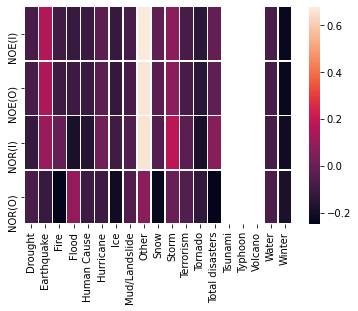

In [198]:
# create heat map using parawise correlation of columns

import seaborn as sns
heatmapdata = heatmapdata.transpose()
ax = sns.heatmap(heatmapdata, linewidth=0.5)
plt.show()